In [279]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as plt
data = pd.read_csv('../Data/02_Clean.csv')

109018.6051966799


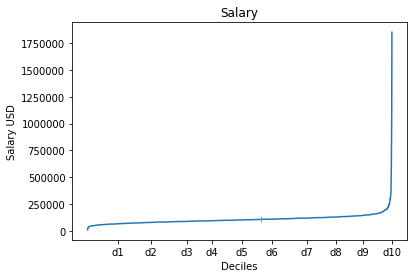

In [329]:
# Salary mean + salary decile
labels = ["d1", "d2","d3", "d4","d5", "d6","d7", "d8","d9", "d10"]
salaryMean = data.SalaryUSD.mean()
salarySort = data.SalaryUSD.sort_values()
salarySort = salarySort.values
salaryDecile = pd.qcut(salarySort, 10, labels=labels)
deciles = salaryDecile.value_counts()

xMean = -1
for i, x in enumerate(salarySort) :
    if x < salaryMean :
        xMean = i

newDeciles = []
save = 0
for x in deciles :
    save += x
    newDeciles.append(save)

salaryPlot = sns.lineplot(data=salarySort)
salaryPlot.set_xticks(newDeciles)
salaryPlot.set_xticklabels(labels)
salaryPlot.set_ylabel("Salary USD")
salaryPlot.set_xlabel("Deciles")
salaryPlot.ticklabel_format(style='plain', axis="y")
salaryPlot.plot(xMean, salaryMean, marker='|')
salaryPlot.set_title("Salary")
print(salaryMean)

Text(0.5, 1.0, 'Salary by Job Title')

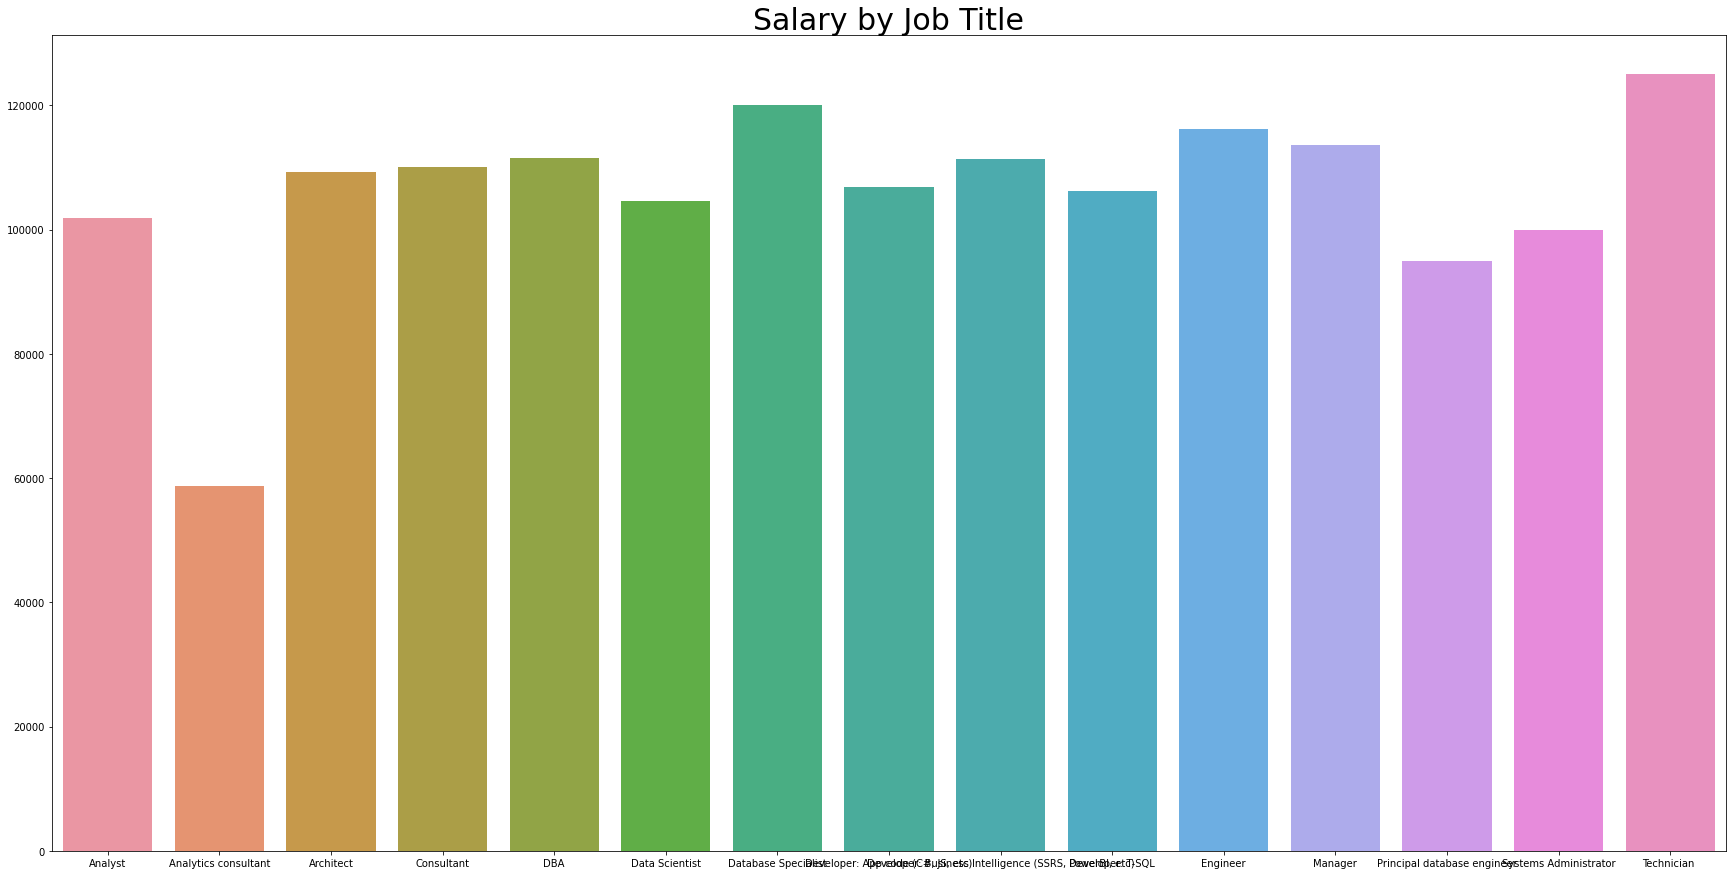

In [333]:
# Salary by job title
salaryJobs = data[["SalaryUSD", "JobTitle"]]
groupSJ = salaryJobs.groupby("JobTitle")
countJT = salaryJobs.value_counts("JobTitle")
salaryMeanByJobs = {}
for x in groupSJ :
    salaryMeanByJobs[x[0]] = x[1].SalaryUSD.mean()

keys = list(salaryMeanByJobs.keys())
values = list(salaryMeanByJobs.values())
salaryJobPlot = sns.barplot(x=keys, y=values)
salaryJobPlot.figure.set_size_inches(30,15)
salaryJobPlot.set_title("Salary by Job Title", fontsize=30)

Text(0.5, 1.0, 'Job repartition')

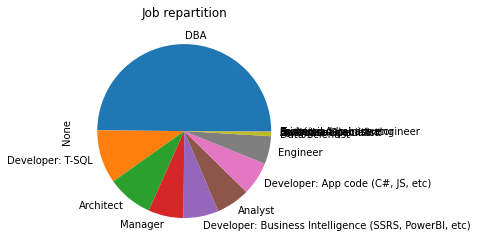

In [334]:
# Job repartition
jobPart = countJT.plot(kind="pie")
jobPart.set_title("Job repartition")

Text(0.5, 1.0, 'Salary by nb of companies')

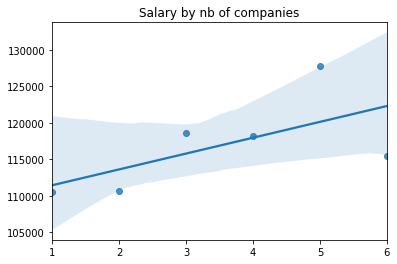

In [336]:
# Salary by nb of companies
slrbynbcomp = data[["SalaryUSD", "HowManyCompanies"]]
groupSC = slrbynbcomp.groupby("HowManyCompanies")

compMean = {}
for x in groupSC :
    if x[0] > 0 :
        compMean[x[0]] = x[1].SalaryUSD.mean()

keys = list(compMean.keys())
values = list(compMean.values())

salaryCompany = sns.regplot(x=keys, y=values)
salaryCompany.set_title("Salary by nb of companies")

Text(0.5, 1.0, 'Salary by team size')

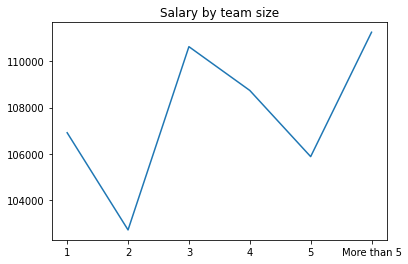

In [337]:
#Salary by team size
slrbyTeampSize = data[["SalaryUSD", "OtherPeopleOnYourTeam"]]
groupTeamSize = slrbyTeampSize.groupby("OtherPeopleOnYourTeam")

Teammean = {}
for x in groupTeamSize :
    if x[0] != "None" :
        Teammean[x[0]] = x[1].SalaryUSD.mean()

salaryByTeamPlot = sns.lineplot(data=Teammean)
salaryByTeamPlot.set_title("Salary by team size")

Text(0.5, 1.0, 'Salary by years')

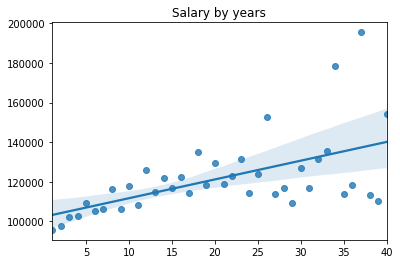

In [347]:
#Salary by years
slrbyYears = data[["SalaryUSD", "YearsWithThisTypeOfJob", "Gender"]]
groupYears = slrbyYears.groupby("YearsWithThisTypeOfJob")

YearsMean = {}
for x in groupYears :
    if x[0] != "None" :
        YearsMean[x[0]] = x[1].SalaryUSD.mean()

keys = list(YearsMean.keys())
values = list(YearsMean.values())

yearsPlot = sns.regplot(x=keys, y=values)
yearsPlot.set_title("Salary by years")

Text(0.5, 1.0, 'Salary by gender')

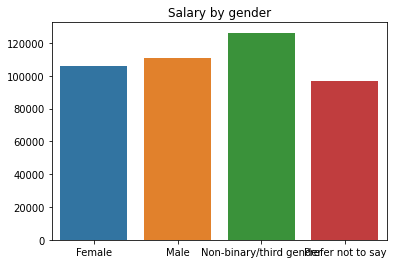

In [346]:
# Salary by gender

slrByGender = data[["SalaryUSD", "Gender"]]
groupGender = slrByGender.groupby("Gender")

GenderMean = {}
for x in groupGender :
    GenderMean[x[0]] = x[1].SalaryUSD.mean()

keys = list(GenderMean.keys())
values = list(GenderMean.values())

genderBarPlot = sns.barplot(x=keys, y=values)

genderBarPlot.set_title("Salary by gender")

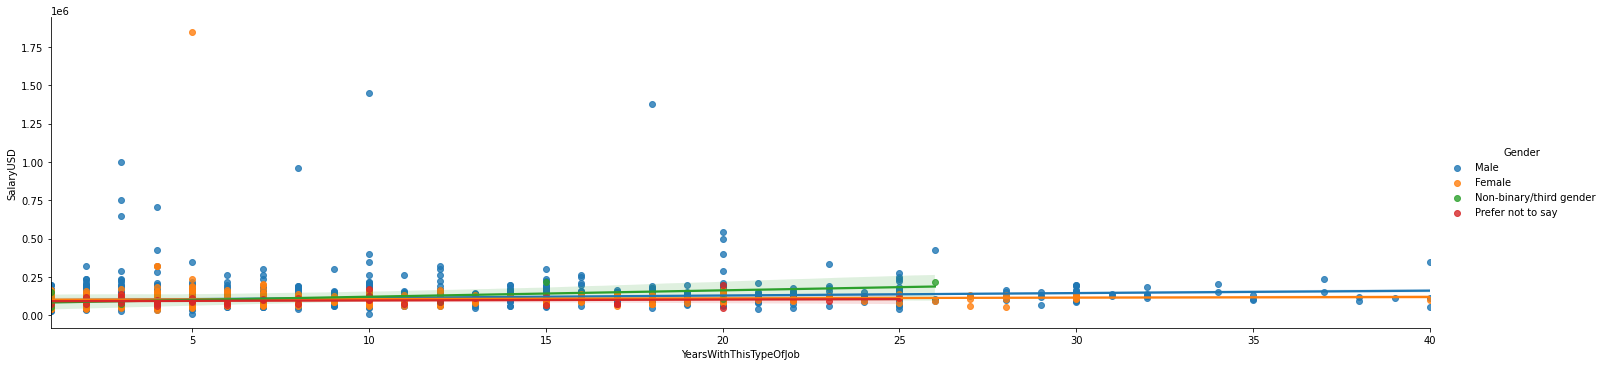

In [404]:
# Salary Years Gender
salaryYearsGender = sns.lmplot(x="YearsWithThisTypeOfJob", y="SalaryUSD", hue="Gender", data=slrbyYears, height=5, aspect=4)